In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
from sklearn.metrics import fbeta_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [5]:
data=pd.read_csv("frb_2_data.csv")

In [6]:
data

,tns_name,repeater_name,dm_exc_ne2001,bc_width,flux,fluence,width_fitb,high_freq,low_freq,peak_freq,redshift,mid_freq,L_dist,bright_temp,rest_pulse_width,rest_freq_bandwidth,burst_energy,luminosity
0,FRB20180725A,-9999,644.2,0.00295,1.70,4.10,0.000296,760.1,485.3,607.4,0.792216,622.70,1.199517e+26,4.630920e+37,0.000165,492.500924,2.512414e+27,1.867010e+30
1,FRB20180727A,-9999,620.9,0.00295,0.58,2.31,0.001390,800.2,400.2,493.3,0.767614,600.20,1.158830e+26,7.297861e+35,0.000786,707.045531,1.087891e+27,4.828238e+29
2,FRB20180729A,-9999,78.8,0.00098,11.70,17.00,0.000100,692.7,400.2,525.6,0.196666,546.45,2.717721e+25,2.787780e+38,0.000084,350.024867,6.930280e+26,5.707695e+29
3,FRB20180729B,-9999,223.2,0.00197,0.92,1.20,0.000314,800.2,441.8,657.5,0.350179,621.00,4.978343e+25,5.119889e+36,0.000233,483.904159,1.819974e+26,1.883923e+29
4,FRB20180730A,-9999,789.7,0.00492,5.20,27.00,0.000468,759.2,400.2,483.5,0.947129,579.70,1.459413e+26,8.908483e+37,0.000240,699.019239,1.794453e+28,6.729243e+30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
589,FRB20190701A,-9999,582.8,0.00197,1.26,1.70,0.000608,800.2,400.2,800.2,0.727410,600.20,1.092710e+26,7.539154e+36,0.000352,690.964190,1.181603e+27,1.512826e+30
590,FRB20190701B,-9999,687.6,0.00295,1.10,1.90,0.000630,732.8,400.2,471.5,0.838220,566.50,1.276044e+26,8.818246e+36,0.000343,611.391878,9.971920e+26,1.061244e+30
591,FRB20190701C,-9999,915.8,0.00197,0.88,2.50,0.001440,495.5,402.2,446.4,1.083240,448.85,1.692618e+26,3.339418e+36,0.000691,194.366306,1.928647e+27,1.414278e+30
592,FRB20190701D,-9999,877.4,0.00885,1.33,8.60,0.001400,651.8,400.2,467.6,1.041637,526.00,1.620886e+26,3.638206e+36,0.000686,513.675789,6.502931e+27,2.053245e+30


In [7]:
data['bc_width']=data['bc_width']*1000
data["rest_pulse_width"]=data['rest_pulse_width']*1000
data['bright_temp']=np.log10(data['bright_temp'])
data['burst_energy']=np.log10(data['burst_energy'])
data['rest_freq_bandwidth']=np.log10(data['rest_freq_bandwidth'])
data['luminosity']=np.log10(data['luminosity'])

for i in range(len(data)):
    if data.iloc[i,1] != '-9999':
       data.iloc[i,0]= data.iloc[i,1]

for i in range(len(data)):
    if data.iloc[i,1] != '-9999':
       data.iloc[i,1]= 1
    else:
        data.iloc[i,1]=0         

In [9]:
data.to_csv("frb_2_final.csv")

In [5]:
file=pd.read_csv('frb_2_final.csv')

In [6]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 594 entries, 0 to 593
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   tns_name             594 non-null    object 
 1   repeater_name        594 non-null    int64  
 2   dm_exc_ne2001        594 non-null    float64
 3   bc_width             594 non-null    float64
 4   flux                 594 non-null    float64
 5   fluence              594 non-null    float64
 6   width_fitb           594 non-null    float64
 7   high_freq            594 non-null    float64
 8   low_freq             594 non-null    float64
 9   peak_freq            594 non-null    float64
 10  redshift             594 non-null    float64
 11  mid_freq             594 non-null    float64
 12  L_dist               594 non-null    float64
 13  bright_temp          594 non-null    float64
 14  rest_pulse_width     594 non-null    float64
 15  rest_freq_bandwidth  594 non-null    flo

In [7]:

x= file.drop(['repeater_name','tns_name','width_fitb','high_freq','low_freq','mid_freq','L_dist'],axis=1)
y=file['repeater_name']

from sklearn.preprocessing import StandardScaler
X =StandardScaler().fit_transform(x)
x=pd.DataFrame(X,columns=['dm_exc_ne2001','bc_width','flux','fluence','peak_freq','redshift','bright_temp','rest_pulse_width','rest_freq_bandwidth','burst_energy','luminosity'])





In [8]:
y=pd.DataFrame(data=y)

# PCA

In [11]:
from sklearn.decomposition import PCA
import sklearn.cluster as cluster
import sklearn.metrics as metrics

Text(0, 0.5, 'cumulative explained variance')

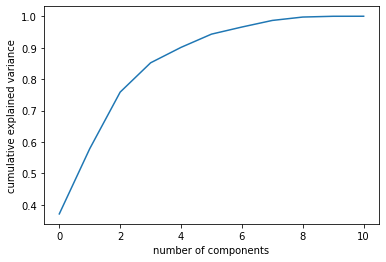

In [12]:
principal=PCA(n_components=11)
principal.fit(x)
plt.plot(np.cumsum(principal.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [74]:
# Set the n_components=3
principal=PCA(n_components=3)
principal.fit(x)
x_tr_1=principal.transform(x)
 
# Check the dimensions of data after PCA
print(x_tr_1.shape)

(594, 3)


Text(0.5, 0.92, 'purple: repeating, blue: non-repeating')

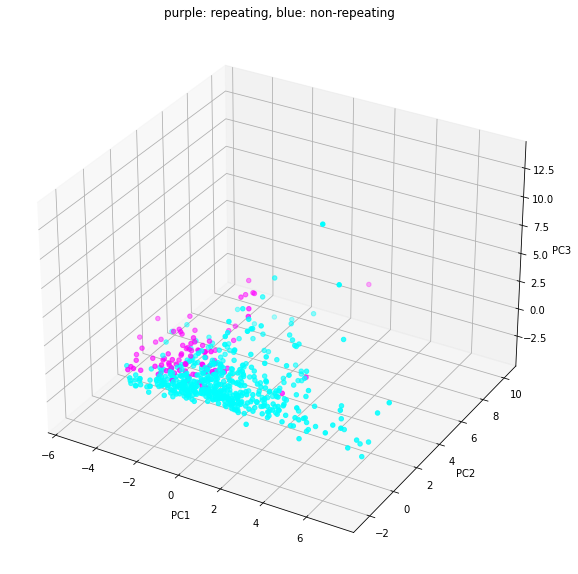

In [85]:
# import relevant libraries for 3d graph
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10,10))
 
# choose projection 3d for creating a 3d graph
axis = fig.add_subplot(111, projection='3d')
 
# x[:,0]is pc1,x[:,1] is pc2 while x[:,2] is pc3
axis.scatter(x_tr_1[:,0],x_tr_1[:,1],x_tr_1[:,2], c=y['repeater_name'],cmap='cool')
axis.set_xlabel("PC1", fontsize=10)
axis.set_ylabel("PC2", fontsize=10)
axis.set_zlabel("PC3", fontsize=10)

axis.set_title('purple: repeating, blue: non-repeating')

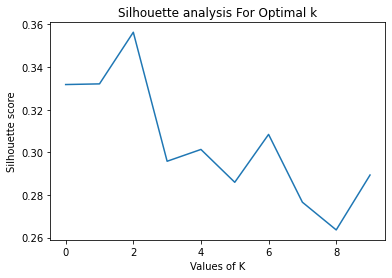

In [15]:
from sklearn.metrics import silhouette_score

k = range(0,10,1)
silhouette_avg = []
for i in k:
 
 # initialise kmeans
 kmeans = kmeans=cluster.KMeans(n_clusters=i+2)
 kmeans.fit(x_tr_1)
 cluster_labels = kmeans.labels_
 
 # silhouette score
 silhouette_avg.append(silhouette_score(x_tr_1, cluster_labels))

plt.plot(k,silhouette_avg)
plt.xlabel('Values of K') 
plt.ylabel('Silhouette score') 
plt.title('Silhouette analysis For Optimal k')
plt.show()

In [16]:
kmeans=cluster.KMeans(n_clusters=2)
clusters_1=kmeans.fit_predict(x_tr_1)

# T-SNE

In [266]:
from sklearn.manifold import TSNE
import seaborn as sns
 
# We want to get TSNE embedding with 2 dimensions
n_components = 2
tsne = TSNE(n_components,n_iter=1000)
x_tr_2= tsne.fit_transform(x)
x_tr_2.shape


/home/pratyaksh/.local/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/pratyaksh/.local/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


(594, 2)

Text(0.5, 1.0, 'Dark Blue: non-repeating, green: repeating')

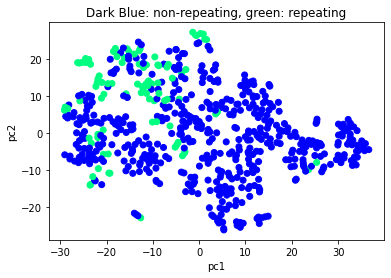

In [267]:
plt.scatter(x_tr_2[:,0],x_tr_2[:,1],c=y['repeater_name'].values,cmap='winter')
plt.xlabel('pc1')
plt.ylabel('pc2')
plt.title('Dark Blue: non-repeating, green: repeating')

In [49]:
import hdbscan

In [292]:
clusters_2= hdbscan.HDBSCAN(min_cluster_size=35,min_samples=2).fit_predict(x_tr_2)

x--------------x

In [ ]:
file['kmeans']=clusters_1

In [355]:

file['hdbscan']=clusters_2

In [294]:
file

,tns_name,repeater_name,dm_exc_ne2001,bc_width,flux,fluence,width_fitb,high_freq,low_freq,peak_freq,redshift,mid_freq,L_dist,bright_temp,rest_pulse_width,rest_freq_bandwidth,burst_energy,luminosity,kmeans,hdbscan
0,FRB20180725A,0,644.2,2.95,1.70,4.10,0.000296,760.1,485.3,607.4,0.792216,622.70,1.199517e+26,37.665667,0.165159,2.692407,27.400091,30.271147,0,-1
1,FRB20180727A,0,620.9,2.95,0.58,2.31,0.001390,800.2,400.2,493.3,0.767614,600.20,1.158830e+26,35.863196,0.786371,2.849447,27.036585,29.683789,1,4
2,FRB20180729A,0,78.8,0.98,11.70,17.00,0.000100,692.7,400.2,525.6,0.196666,546.45,2.717721e+25,38.445258,0.083565,2.544099,26.840751,29.756461,1,3
3,FRB20180729B,0,223.2,1.97,0.92,1.20,0.000314,800.2,441.8,657.5,0.350179,621.00,4.978343e+25,36.709261,0.232562,2.684759,26.260065,29.275063,1,1
4,FRB20180730A,0,789.7,4.92,5.20,27.00,0.000468,759.2,400.2,483.5,0.947129,579.70,1.459413e+26,37.949804,0.240354,2.844489,28.253932,30.827966,0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
589,FRB20190701A,0,582.8,1.97,1.26,1.70,0.000608,800.2,400.2,800.2,0.727410,600.20,1.092710e+26,36.877323,0.351972,2.839456,27.072472,30.179789,0,1
590,FRB20190701B,0,687.6,2.95,1.10,1.90,0.000630,732.8,400.2,471.5,0.838220,566.50,1.276044e+26,36.945382,0.342723,2.786320,26.998779,30.025815,0,3
591,FRB20190701C,0,915.8,1.97,0.88,2.50,0.001440,495.5,402.2,446.4,1.083240,448.85,1.692618e+26,36.523671,0.691231,2.288621,27.285253,30.150535,0,4
592,FRB20190701D,0,877.4,8.85,1.33,8.60,0.001400,651.8,400.2,467.6,1.041637,526.00,1.620886e+26,36.560887,0.685724,2.710689,27.813109,30.312441,0,4


In [319]:
file.to_csv("output_frb_2.csv")

In [182]:
len(file[(file['kmeans']==0) & (file['repeater_name']==0)])

214

In [183]:
len(file[(file['kmeans']==0) & (file['repeater_name']==1)])

3

In [184]:
len(file[(file['kmeans']==1) & (file['repeater_name']==0)])

286

In [185]:
len(file[(file['kmeans']==1) & (file['repeater_name']==1)])

91

Text(0.5, 0.92, 'purple: repeating, blue: non-repeating')

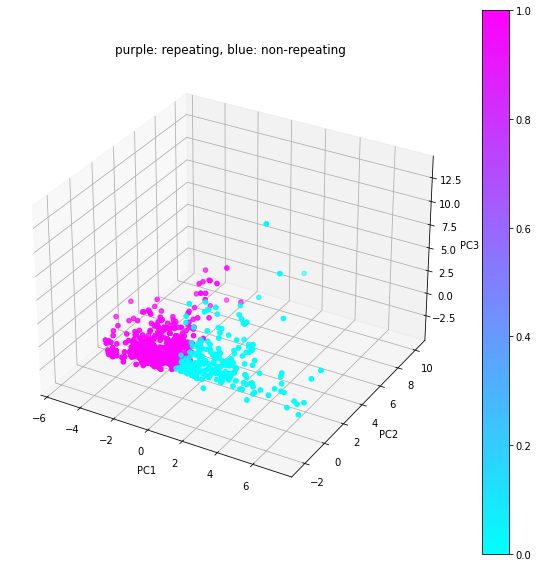

In [81]:
# import relevant libraries for 3d graph
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10,10))
 
# choose projection 3d for creating a 3d graph
axis = fig.add_subplot(111, projection='3d')
 
# x[:,0]is pc1,x[:,1] is pc2 while x[:,2] is pc3
axis.scatter(x_tr_1[:,0],x_tr_1[:,1],x_tr_1[:,2], c=file['kmeans'],cmap='cool')
plt.colorbar(axis.scatter(x_tr_1[:,0],x_tr_1[:,1],x_tr_1[:,2], c=file['kmeans'],cmap='cool'))
axis.set_xlabel("PC1", fontsize=10)
axis.set_ylabel("PC2", fontsize=10)
axis.set_zlabel("PC3", fontsize=10)

axis.set_title('purple: repeating, blue: non-repeating')

x---------x

In [295]:
len(file[(file['hdbscan']==-1) & (file['repeater_name']==0)])

111

In [296]:
len(file[(file['hdbscan']==-1) & (file['repeater_name']==1)])

34

In [297]:
len(file[(file['hdbscan']==0) & (file['repeater_name']==0)])

117

In [298]:
len(file[(file['hdbscan']==0) & (file['repeater_name']==1)])

24

In [299]:
len(file[(file['hdbscan']==1) & (file['repeater_name']==0)])

64

In [300]:
len(file[(file['hdbscan']==1) & (file['repeater_name']==1)])

32

In [301]:
len(file[(file['hdbscan']==2) & (file['repeater_name']==0)])

44

In [302]:
len(file[(file['hdbscan']==2) & (file['repeater_name']==1)])

0

In [303]:
len(file[(file['hdbscan']==3) & (file['repeater_name']==0)])

49

In [304]:
len(file[(file['hdbscan']==3) & (file['repeater_name']==1)])

0

In [305]:
len(file[(file['hdbscan']==4) & (file['repeater_name']==0)])

115

In [306]:
len(file[(file['hdbscan']==4) & (file['repeater_name']==1)])

4

In [ ]:
non:3,2,
others:4
rep:-1,1,0

In [345]:
file['hdbscan'].mask(file['hdbscan'] == -1, 'repeating', inplace=True)
file['hdbscan'].mask(file['hdbscan'] == 0, 'repeating', inplace=True)
file['hdbscan'].mask(file['hdbscan'] == 1, 'repeating', inplace=True)
file['hdbscan'].mask(file['hdbscan'] == 2, 'non_repeating', inplace=True)
file['hdbscan'].mask(file['hdbscan'] == 3, 'non_repeating', inplace=True)
file['hdbscan'].mask(file['hdbscan'] == 4, 'others', inplace=True)

In [376]:
file2['kmeans'].mask(file2['kmeans']==1,'repeating',inplace=True)
file2['kmeans'].mask(file2['kmeans']==0,'non_repeating',inplace=True)

In [378]:
file2['hdbscan'].mask(file2['hdbscan'] == -1, 'repeating', inplace=True)
file2['hdbscan'].mask(file2['hdbscan'] == 0, 'repeating', inplace=True)
file2['hdbscan'].mask(file2['hdbscan'] == 1, 'repeating', inplace=True)
file2['hdbscan'].mask(file2['hdbscan'] == 2, 'non_repeating', inplace=True)
file2['hdbscan'].mask(file2['hdbscan'] == 3, 'non_repeating', inplace=True)
file2['hdbscan'].mask(file2['hdbscan'] == 4, 'others', inplace=True)

In [380]:
file2.to_csv('frb2_finel_output.csv')

In [359]:
file['pc1']=x_tr_2[:,0]
file['pc2']=x_tr_2[:,1]

In [360]:
file

,tns_name,repeater_name,dm_exc_ne2001,bc_width,flux,fluence,width_fitb,high_freq,low_freq,peak_freq,...,L_dist,bright_temp,rest_pulse_width,rest_freq_bandwidth,burst_energy,luminosity,kmeans,hdbscan,pc1,pc2
0,FRB20180725A,0,644.2,2.95,1.70,4.10,0.000296,760.1,485.3,607.4,...,1.199517e+26,37.665667,0.165159,2.692407,27.400091,30.271147,0,-1,8.588955,-9.362112
1,FRB20180727A,0,620.9,2.95,0.58,2.31,0.001390,800.2,400.2,493.3,...,1.158830e+26,35.863196,0.786371,2.849447,27.036585,29.683789,1,4,7.557559,5.943826
2,FRB20180729A,0,78.8,0.98,11.70,17.00,0.000100,692.7,400.2,525.6,...,2.717721e+25,38.445258,0.083565,2.544099,26.840751,29.756461,1,3,3.085840,-22.634439
3,FRB20180729B,0,223.2,1.97,0.92,1.20,0.000314,800.2,441.8,657.5,...,4.978343e+25,36.709261,0.232562,2.684759,26.260065,29.275063,1,1,-8.075387,4.187779
4,FRB20180730A,0,789.7,4.92,5.20,27.00,0.000468,759.2,400.2,483.5,...,1.459413e+26,37.949804,0.240354,2.844489,28.253932,30.827966,0,-1,10.920242,-17.192406
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
589,FRB20190701A,0,582.8,1.97,1.26,1.70,0.000608,800.2,400.2,800.2,...,1.092710e+26,36.877323,0.351972,2.839456,27.072472,30.179789,0,1,-0.693149,3.016088
590,FRB20190701B,0,687.6,2.95,1.10,1.90,0.000630,732.8,400.2,471.5,...,1.276044e+26,36.945382,0.342723,2.786320,26.998779,30.025815,0,3,10.556457,-5.224068
591,FRB20190701C,0,915.8,1.97,0.88,2.50,0.001440,495.5,402.2,446.4,...,1.692618e+26,36.523671,0.691231,2.288621,27.285253,30.150535,0,4,13.406845,-1.767762
592,FRB20190701D,0,877.4,8.85,1.33,8.60,0.001400,651.8,400.2,467.6,...,1.620886e+26,36.560887,0.685724,2.710689,27.813109,30.312441,0,4,19.816984,-9.188779


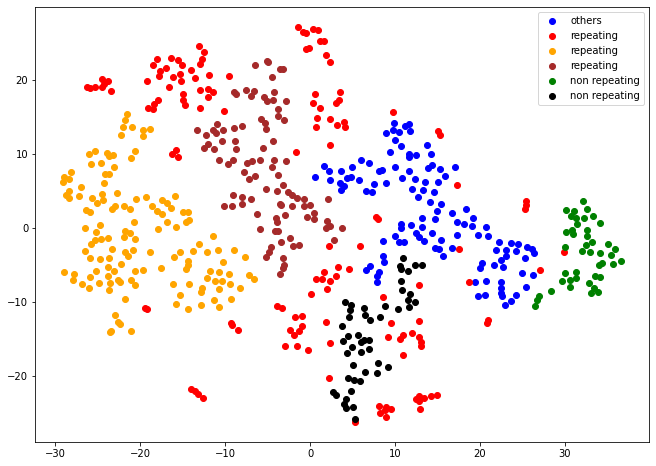

In [372]:
plt.figure(figsize=(11,8))
plt.scatter(file[file['hdbscan']==4]['pc1'],file[file['hdbscan']==4]['pc2'],color='blue',label='others')
plt.scatter(file[file['hdbscan']==-1]['pc1'],file[file['hdbscan']==-1]['pc2'],color='red',label='repeating')
plt.scatter(file[file['hdbscan']==0]['pc1'],file[file['hdbscan']==0]['pc2'],color='orange',label='repeating')
plt.scatter(file[file['hdbscan']==1]['pc1'],file[file['hdbscan']==1]['pc2'],color='brown',label='repeating')
plt.scatter(file[file['hdbscan']==2]['pc1'],file[file['hdbscan']==2]['pc2'],color='green',label='non repeating')
plt.scatter(file[file['hdbscan']==3]['pc1'],file[file['hdbscan']==3]['pc2'],color='black',label='non repeating')
plt.legend()

xxxxxxxxxxxxxxxxxxxxxxxxxxxx

In [23]:
file=pd.read_csv('frb2_finel_output.csv')

In [25]:
file[(file['repeater_name']==0)&(file['kmeans']=='repeating')&(file['hdbscan']=='repeating')]

,tns_name,repeater_name,dm_exc_ne2001,bc_width,flux,fluence,width_fitb,high_freq,low_freq,peak_freq,redshift,mid_freq,L_dist,bright_temp,rest_pulse_width,rest_freq_bandwidth,burst_energy,luminosity,kmeans,hdbscan
3,FRB20180729B,0,223.2,1.97,0.92,1.20,0.000314,800.2,441.8,657.5,0.350179,621.00,4.978343e+25,36.709261,0.232562,2.684759,26.260065,29.275063,repeating,repeating
7,FRB20180810A,0,310.2,1.97,1.10,1.70,0.000322,800.2,400.2,552.9,0.441687,600.20,6.374373e+25,36.980830,0.223350,2.760931,26.522309,29.492124,repeating,repeating
8,FRB20180810B,0,123.3,0.98,5.20,7.90,0.000311,778.6,400.2,400.2,0.244370,589.40,3.408446e+25,37.221562,0.249926,2.672901,26.569277,29.482603,repeating,repeating
10,FRB20180814B,0,197.2,5.90,3.40,10.60,0.000764,800.2,400.2,800.2,0.322777,600.20,4.567009e+25,36.468214,0.577573,2.723547,27.225491,29.853151,repeating,repeating
11,FRB20180814B,0,197.2,5.90,3.40,10.60,0.000830,800.2,400.2,800.2,0.322777,600.20,4.567009e+25,36.396245,0.627468,2.723547,27.225491,29.853151,repeating,repeating
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
570,FRB20190625A,0,279.0,58.00,0.35,11.90,0.003920,639.7,400.2,400.2,0.408884,519.95,5.870095e+25,34.375725,2.782344,2.528181,27.165449,28.782845,repeating,repeating
574,FRB20190625C,0,366.1,0.98,2.22,4.02,0.000547,768.7,400.2,410.7,0.500192,584.45,7.283889e+25,36.947200,0.364620,2.742584,26.865541,29.783814,repeating,repeating
577,FRB20190627A,0,373.9,1.97,1.98,2.62,0.000663,634.6,400.2,474.6,0.508392,517.40,7.412378e+25,36.849123,0.439541,2.548472,26.755240,29.812118,repeating,repeating
582,FRB20190628B,0,361.5,2.95,0.75,1.39,0.000270,583.5,400.2,400.2,0.495391,491.85,7.208788e+25,37.231375,0.180555,2.437917,26.385472,29.292273,repeating,repeating


In [4]:
from sklearn.feature_selection import mutual_info_classif

In [15]:
kmeans_scores = mutual_info_classif(x,y['kmeans'])

In [18]:
hdbscan_scores = mutual_info_classif(x,y['hdbscan'])

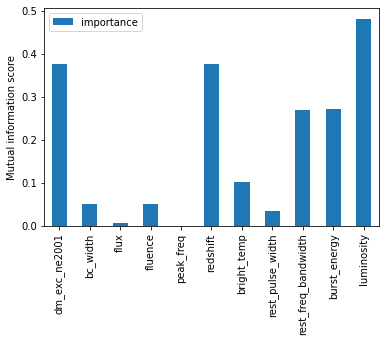

In [21]:
feature_importances = pd.DataFrame(kmeans_scores, index =x.columns,  columns=['importance'])
feature_importances.plot.bar()    # plotting ranking based on their importance   
plt.ylabel("Mutual information score")
plt.show()

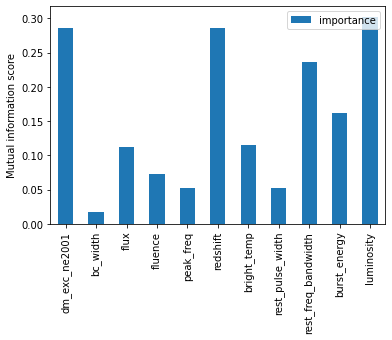

In [22]:
feature_importances = pd.DataFrame(hdbscan_scores, index =x.columns,  columns=['importance'])
feature_importances.plot.bar()    # plotting ranking based on their importance   
plt.ylabel("Mutual information score")
plt.show()